In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import joblib


In [2]:
data = pd.read_csv('expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [3]:
ds = data.copy()

In [4]:
ds.info

<bound method DataFrame.info of        Unnamed: 0         TENURE  MONTANT  FREQUENCE_RECH  REVENUE  \
0               0   K > 24 month   3000.0             4.0   3002.0   
1               1   K > 24 month   1500.0             3.0   1980.0   
2               2   K > 24 month   9850.0            32.0   9639.0   
3               3  I 18-21 month   1000.0             2.0    999.0   
4               4   K > 24 month   1200.0             3.0   1180.0   
...           ...            ...      ...             ...      ...   
64371       34995   K > 24 month   2300.0            10.0   2224.0   
64372       34996   K > 24 month  10800.0            27.0  10801.0   
64373       34997   K > 24 month   4000.0             4.0   4007.0   
64374       34998   K > 24 month  13600.0            28.0  14600.0   
64375       34999   K > 24 month   1400.0             8.0   1100.0   

       ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET MRG  REGULARITY  CHURN  
0            1001.0        8.0        266.0     1.

In [6]:
cats = ds.select_dtypes(exclude = 'number')
nums = ds.select_dtypes(include = 'number')

print('Categorical Dataset')
display(cats.head())
print(f'\n\nNumerical Dataset')
display(nums.head())

Categorical Dataset


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO




Numerical Dataset


,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [7]:
ds.drop('Unnamed: 0', axis = 1, inplace = True)
ds.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

encoded = {}

for i in ds.select_dtypes(exclude = 'number'):   
    encoder = LabelEncoder() 
    ds[i] = encoder.fit_transform(ds[i]) 
    encoded[i + '_encoder'] = encoder 
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb')) 

encoded

{'TENURE_encoder': LabelEncoder(), 'MRG_encoder': LabelEncoder()}

In [10]:
toBeScaled = ['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'DATA_VOLUME']
scaled = {}

for i in toBeScaled:
    scaler = StandardScaler()
    ds[i] = scaler.fit_transform(ds[[i]])
    scaled[i + '_scaled'] = scaler
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb')) 

scaled

{'MONTANT_scaled': StandardScaler(),
 'REVENUE_scaled': StandardScaler(),
 'ARPU_SEGMENT_scaled': StandardScaler(),
 'DATA_VOLUME_scaled': StandardScaler()}

In [11]:
ds.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,7,-0.304123,4.0,-0.314144,-0.314002,8.0,-0.380804,1.0,0,32,1
1,7,-0.525441,3.0,-0.461982,-0.461985,5.0,0.138867,1.0,0,29,1
2,7,0.706564,32.0,0.645935,0.645934,38.0,-0.070404,4.0,0,49,1
3,5,-0.599214,2.0,-0.603890,-0.603892,2.0,-0.317423,8.0,0,1,1
4,7,-0.569705,3.0,-0.577707,-0.577854,3.0,-0.037885,28.0,0,21,1


In [12]:
x = ds.drop('CHURN', axis = 1)
y = ds.CHURN

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.9, stratify = y, random_state = 5)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

cross_validation = rf_model.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31465
           1       1.00      1.00      1.00     26473

    accuracy                           1.00     57938
   macro avg       1.00      1.00      1.00     57938
weighted avg       1.00      1.00      1.00     57938



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

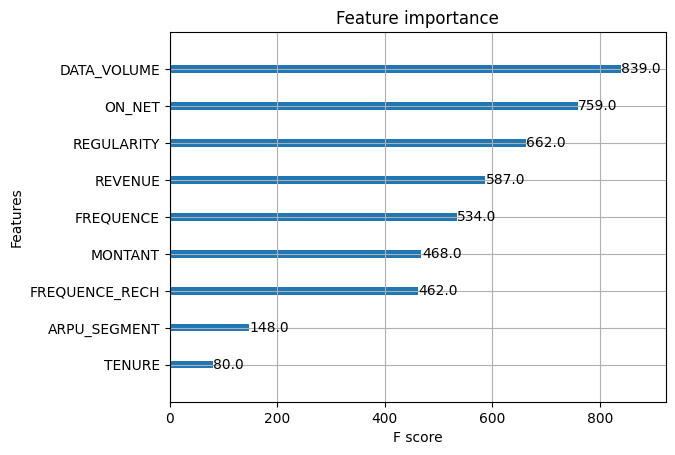

In [14]:
import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBClassifier()

x = ds.drop('CHURN', axis = 1)
y = ds.CHURN

model.fit(x, y)

xgb.plot_importance(model, importance_type = 'weight')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)


cross_validation = log_reg.predict(xtrain) 
print(classification_report(cross_validation, ytrain)) 

              precision    recall  f1-score   support

           0       0.78      0.79      0.78     31366
           1       0.75      0.74      0.74     26572

    accuracy                           0.77     57938
   macro avg       0.76      0.76      0.76     57938
weighted avg       0.77      0.77      0.77     57938



c:\Users\Spectre X360\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

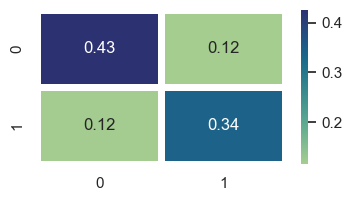

In [16]:
revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

[Text(0, 0, '35000'), Text(0, 0, '29376')]

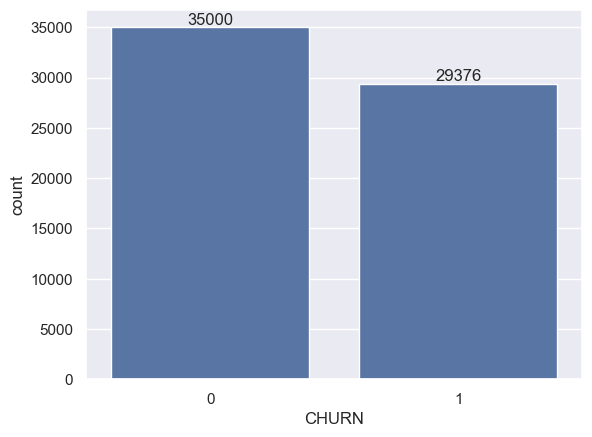

In [17]:
fig = sns.countplot(x = ds.CHURN)
fig.bar_label(fig.containers[0])

In [29]:
joblib.dump(log_reg, open('ExpressoModel.pkl', 'wb'))